### Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


Imports

In [44]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
# import datetime


In [45]:
# pd.show_versions()

Import logins data set

In [46]:
# Load data set
logins = pd.read_json(r'D:\lalo\ultimate_challenge\logins.json')

In [47]:
# Print first five rows of data set
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [48]:
#Call the info method on logins to see a summary of the data
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [49]:
# Extract components from the timestamp, such as year, month, day, hour, and day of the week.
logins['month']=logins['login_time'].dt.month
logins['day_of_month']=logins['login_time'].dt.day
logins['hour']=logins['login_time'].dt.hour
logins['date']=logins['login_time'].dt.date
logins['day_of_year']=logins['login_time'].dt.day_of_year
logins['weekday']=logins['login_time'].dt.weekday
logins['month_name']=logins['login_time'].dt.month_name()

# logins['day_name']=logins['login_time'].dt.day_name()
# logins['year']=logins['login_time'].dt.year
# logins['quarter']=logins['login_time'].dt.quarter
# logins['leapyear']=logins['login_time'].dt.is_leap_year
# logins['second']=logins['login_time'].dt.second
# logins['minute']=logins['login_time'].dt.minute

When working with time series data, it is crucial to create meaningful features to extract valuable insights. These features can capture seasonality, trends, and periodic patterns.

In [50]:
logins.head()

,login_time,month,day_of_month,hour,date,day_of_year,weekday,month_name
0,1970-01-01 20:13:18,1,1,20,1970-01-01,1,3,January
1,1970-01-01 20:16:10,1,1,20,1970-01-01,1,3,January
2,1970-01-01 20:16:37,1,1,20,1970-01-01,1,3,January
3,1970-01-01 20:16:36,1,1,20,1970-01-01,1,3,January
4,1970-01-01 20:26:21,1,1,20,1970-01-01,1,3,January


In [51]:
#Call the info method on logins to see a summary of the data
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   login_time    93142 non-null  datetime64[ns]
 1   month         93142 non-null  int32         
 2   day_of_month  93142 non-null  int32         
 3   hour          93142 non-null  int32         
 4   date          93142 non-null  object        
 5   day_of_year   93142 non-null  int32         
 6   weekday       93142 non-null  int32         
 7   month_name    93142 non-null  object        
dtypes: datetime64[ns](1), int32(5), object(2)
memory usage: 3.9+ MB


In [52]:
# Statistical summary of the numerical columns
logins.describe()

,login_time,month,day_of_month,hour,day_of_year,weekday
count,93142,93142.000000,93142.000000,93142.000000,93142.000000,93142.000000
mean,1970-02-26 19:09:39.779648278,2.424062,14.667830,11.635363,57.292532,3.570301
min,1970-01-01 20:12:16,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1970-02-04 10:37:19.750000,2.000000,7.000000,4.000000,35.000000,2.000000
50%,1970-03-01 06:33:05.500000,3.000000,14.000000,12.000000,60.000000,4.000000
75%,1970-03-22 04:01:10.750000,3.000000,22.000000,19.000000,81.000000,5.000000
max,1970-04-13 18:57:38,4.000000,31.000000,23.000000,103.000000,6.000000
std,NaN,0.995154,8.596967,7.816792,28.557264,1.946072


In [53]:
# Find the Uniqueness and count their values form day_of_month and weekday columns
logins['day_of_month'].value_counts().sort_index()

day_of_month
1     3194
2     3044
3     3475
4     4037
5     3223
6     3281
7     4006
8     4019
9     2832
10    3297
11    3863
12    3614
13    3021
14    3426
15    3331
16    2215
17    3044
18    2945
19    2859
20    2885
21    3487
22    3507
23    2233
24    2318
25    2348
26    2176
27    2735
28    3540
29    2197
30    1415
31    1575
Name: count, dtype: int64

In [54]:
logins['weekday'].value_counts().sort_index()

weekday
0     8823
1     9268
2    10339
3    11960
4    15208
5    19377
6    18167
Name: count, dtype: int64

<Axes: xlabel='month_name', ylabel='count'>

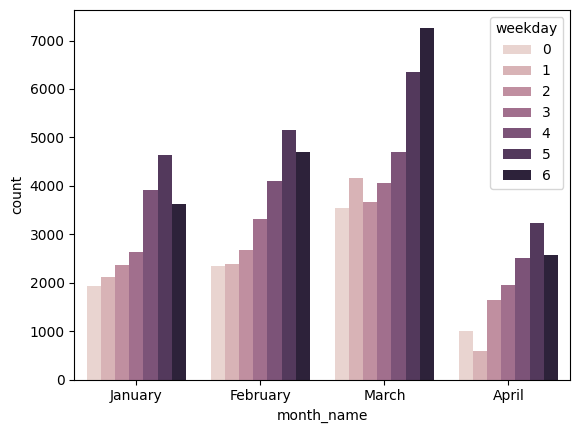

In [55]:
sns.countplot(logins, x='month_name', hue='weekday' )

The monthly login count showed an upward trend from January to March, followed by a decline starting in April.

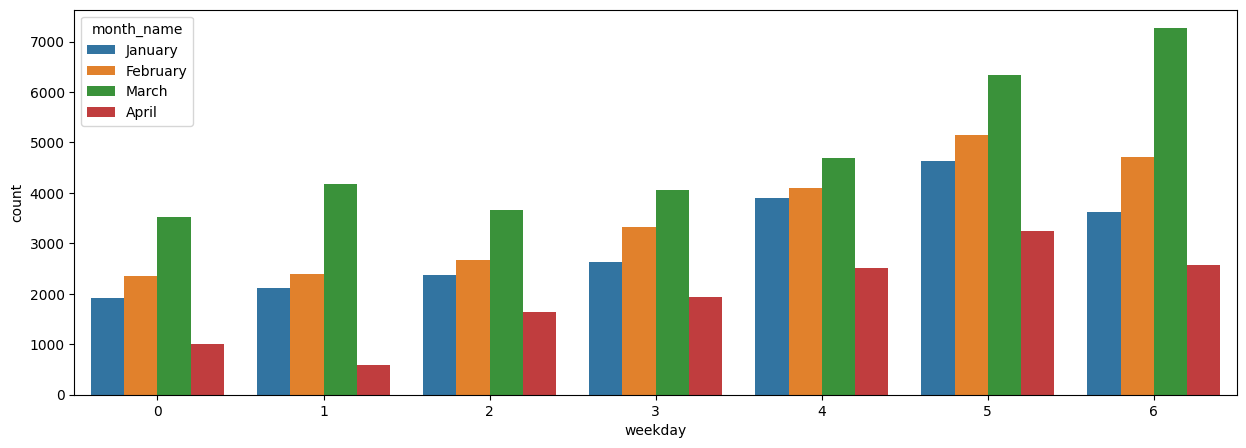

In [56]:
plt.figure(figsize=(15,5))
g= sns.countplot(logins, x='weekday', hue = "month_name" )

Noting that login activity seems to peak on Saturdays and Sundays.


<Axes: xlabel='weekday', ylabel='count'>

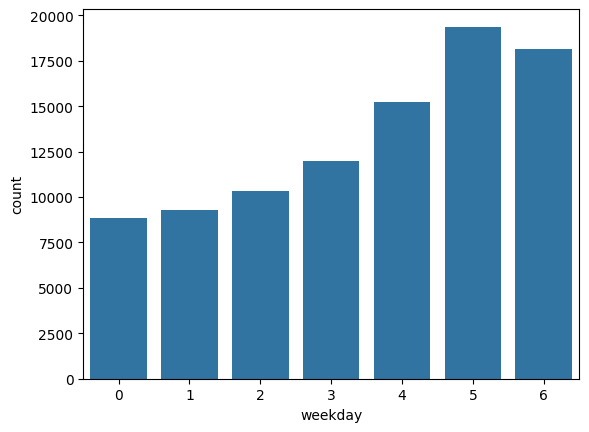

In [57]:
sns.countplot(logins, x= 'weekday')

<Axes: xlabel='hour', ylabel='count'>

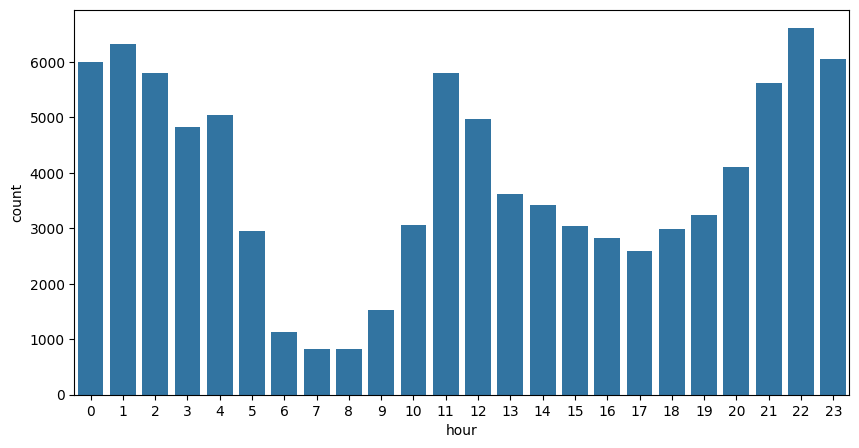

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(logins, x= 'hour')

In [59]:
logins.month.value_counts().sort_index()


month
1    21239
2    24673
3    33723
4    13507
Name: count, dtype: int64

Text(0.5, 0, 'January Month(Hours)')

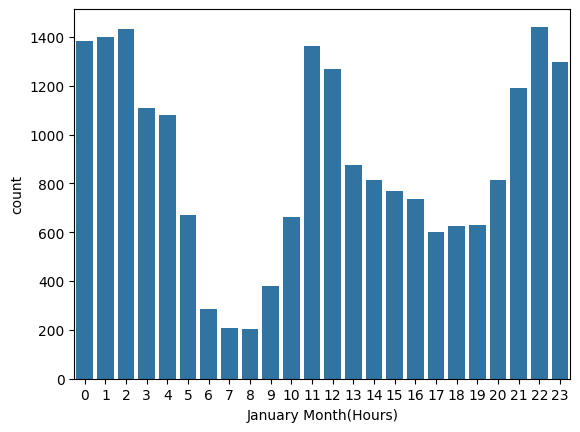

In [60]:
jan = pd.DataFrame(logins.hour[logins['month']==1])
sns.countplot(jan,x= "hour" )
plt.xlabel("January Month(Hours)")


Text(0.5, 0, 'February Month(Hours)')

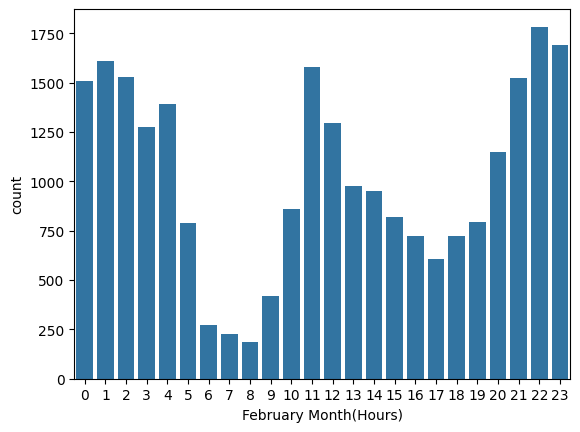

In [61]:
feb = pd.DataFrame(logins.hour[logins['month']==2])
sns.countplot(feb,x= "hour" )
plt.xlabel("February Month(Hours)")

Text(0.5, 0, 'March Month(Hours)')

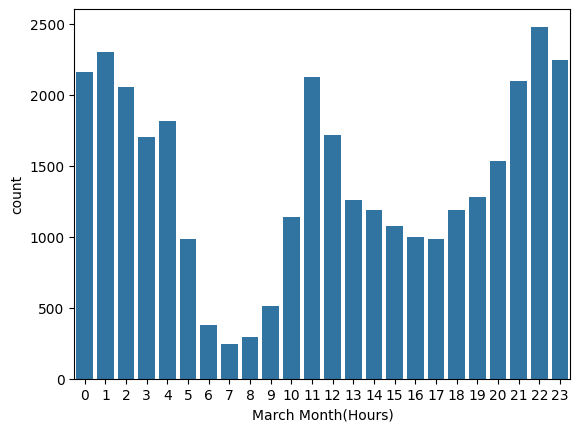

In [62]:
march = pd.DataFrame(logins.hour[logins['month']==3])
sns.countplot(march,x= "hour" )
plt.xlabel("March Month(Hours)")


Text(0.5, 0, 'April Month(Hours)')

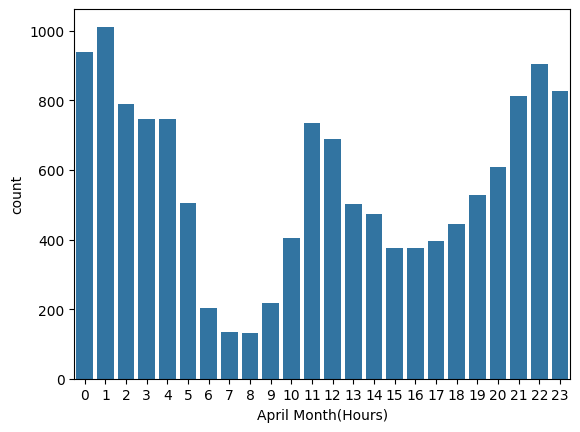

In [63]:
April = pd.DataFrame(logins.hour[logins['month']==4])
sns.countplot(April,x= "hour" )
plt.xlabel("April Month(Hours)")


The count plots indicates a decrease in logins between 6:00 am and 9:00 am compared to other login hours.

In [64]:
logins.columns

Index(['login_time', 'month', 'day_of_month', 'hour', 'date', 'day_of_year',
       'weekday', 'month_name'],
      dtype='object')

<Axes: xlabel='day_of_month', ylabel='count'>

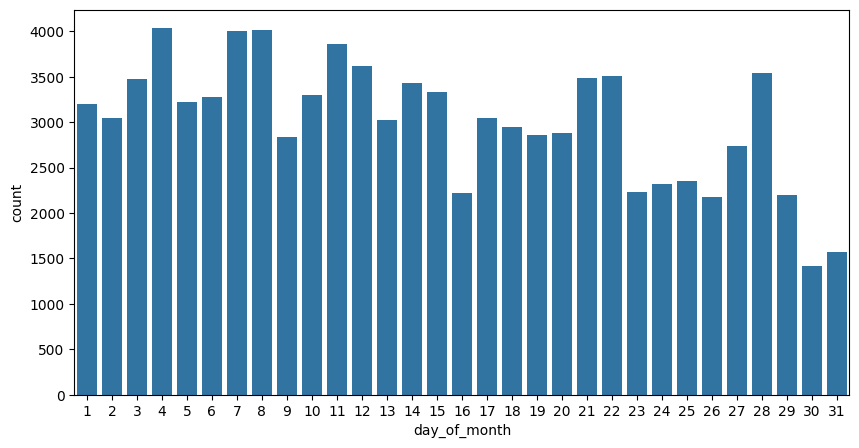

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(logins, x= 'day_of_month')

Summary

1. **Seasonality in Logins**:
   - The login count exhibits seasonality, with a drop in April following the increasing trend from January to March.
   - This pattern suggests a recurring cycle that should be further investigated.

2. **Peak Login Hour**:
   - Consistently, the peak login hours occur between 9 pm and 2 am.
   - Decresing logins between 6:00 am and 9:00 am.
   - This information can guide resource allocation and system maintenance.

3. **Weekend Activity**:
   - Logins are notably higher on weekends (Saturday and Sunday).
   - Understanding this trend can help optimize support and server capacity.


### Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?


Ans:- 
The Average Wait Time for Riders metric measures rider experience and driver availability before and after toll reimbursement.

The decrease in average wait time suggests that more driver partners are now operating in both cities, leading to quicker response times for riders. This indicates that the experiment has successfully encouraged drivers to cross the toll bridge and serve both cities, thereby enhancing service availability for riders.A decrease in wait time indicates improved service availability and customer satisfaction.

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:


a) how you will implement the experiment

b) what statistical test(s) you will conduct to verify the significance of the
observation

c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.



Ans. a) 

Baseline Data Collection: Before implementing the toll reimbursement policy, collect historical data on average wait times for riders in both Ultimate Gotham and Ultimate Metropolis during weekdays and weekends. This will be used as a baseline for comparison.

Implementation of Toll Reimbursement: Implement the toll reimbursement policy for driver partners operating between Ultimate Gotham and Ultimate Metropolis.

Data Collection Post-Implementation: After a reasonable period, for example, one month, of implementing the toll reimbursement policy, collect new data on average wait times for riders in both cities during weekdays and weekends.

Ans. b) 

For this case, a t-test would be conducted to compare the average wait times before and after the implementation of the toll reimbursement policy within each city separately. This test assesses whether there is a statistically significant difference in average wait times pre- and post-implementation within each city.

Ans. c) 

Significant Decrease in Average Wait Times: If the paired t-tests show a statistically significant decrease in average wait times within each city and the independent t-test shows a significant difference between the two cities post-implementation, it suggests that the toll reimbursement policy has been effective in encouraging driver partners to serve both cities.

No Significant Change: If the statistical tests do not reveal a significant decrease in average wait times or if the changes are not significantly different between the two cities post-implementation, it indicates that the toll reimbursement policy may not have had the desired effect.

Recommendations: 

If the results indicate a significant decrease in average wait times and differential effects between the two cities, the recommendation would be to continue and possibly expand the toll reimbursement policy.

If the results show no significant change in average wait times or minimal differential effects between the two cities, it would be advisable to reevaluate the toll reimbursement policy. This could involve identifying potential barriers to its effectiveness, gathering feedback from driver partners, and considering alternative strategies to promote cross-city service.



### Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).


In [66]:
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [67]:
df = pd.read_json(r'D:\lalo\ultimate_challenge\ultimate_data_challenge.json')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [69]:
df.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [70]:
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41445 entries, 0 to 41444
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.5+ MB


In [71]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,8.898709,61.254897,5.460046,4.776446
std,4.059336,0.616104,0.198747,18.322061,34.813848,5.145174,0.404606
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.780000,5.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


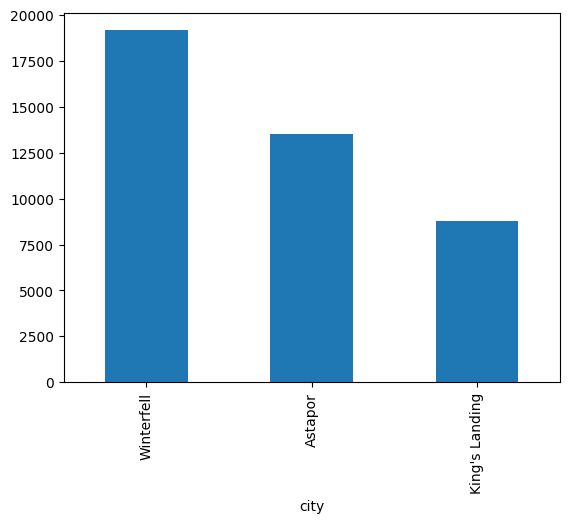

In [72]:
df['city'].value_counts().plot.bar();


<Axes: xlabel='ultimate_black_user'>

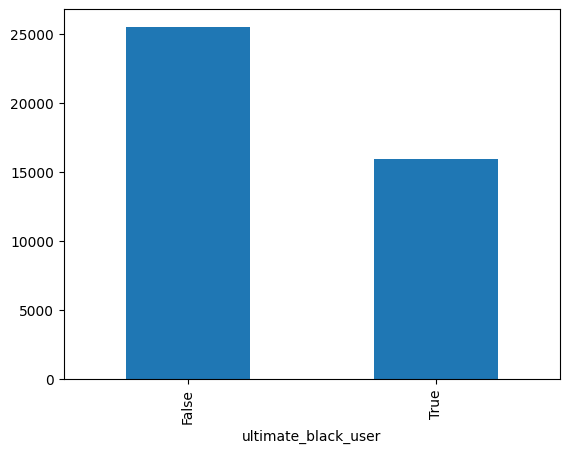

In [73]:
df['ultimate_black_user'].value_counts().plot.bar()

<Axes: xlabel='phone'>

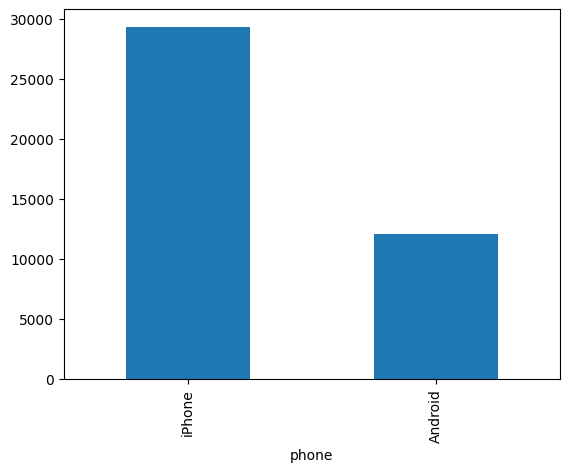

In [74]:
df['phone'].value_counts().plot.bar()

In [75]:
ultimate_count = len(df[df["ultimate_black_user"] == 1])
ultimate_pct = ultimate_count/len(df) * 100
print("Ultimate Black Users: ", ultimate_pct, '%')

Ultimate Black Users:  38.40994088551092 %


In [76]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [77]:
from datetime import datetime as dt
last_trip_sorted = df['last_trip_date'].sort_values(axis=0).reset_index(drop=True)
#create active column
d1 = dt(2014,6,1)
d2 = dt(2014,7,1)
active = []
for i in df['last_trip_date']:
    if i > d1 and i < d2:
        active.append(1)
    else:
        active.append(0)
        
#add column
df['active'] = active

#total number of active users
active_total = df['active'].sum()
print('Total retained users: ', active_total)
print('Percentage of retained users: ' +str(active_total / len (df['active'])*100))

Total retained users:  16079
Percentage of retained users: 38.795994691760164


C:\Users\pmani\AppData\Local\Temp\ipykernel_22756\3436462267.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["Inactive", "Active"])


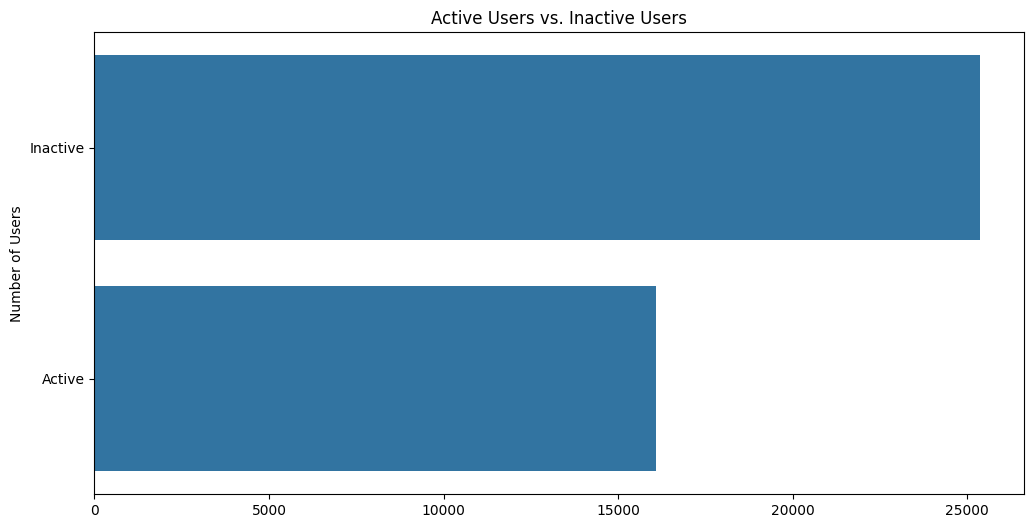

In [78]:
import seaborn as sns
f, axes = plt.subplots(figsize=(12,6))
ax = sns.countplot(y=df["active"])
ax.set(title="Active Users vs. Inactive Users", \
       xlabel="", ylabel="Number of Users")
ax.set_yticklabels(["Inactive", "Active"])
plt.show()

Text(0.5, 1.0, 'Logins by Month')

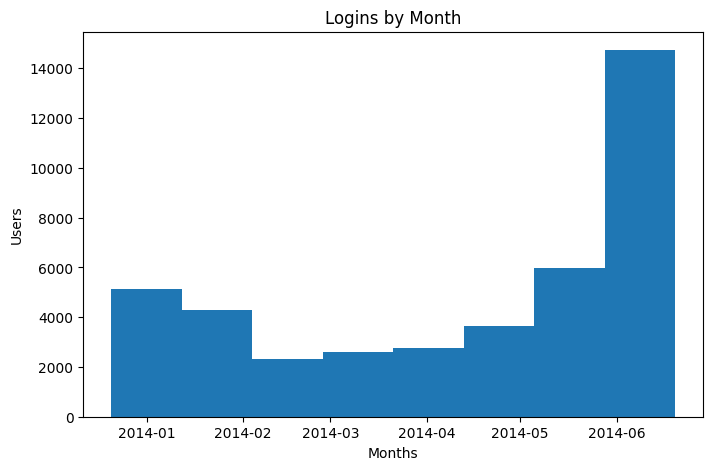

In [79]:
fig = plt.figure(figsize=(8,5))
plt.hist(df['last_trip_date'], bins=8, align='left')
plt.xlabel('Months')
plt.ylabel('Users')
plt.title('Logins by Month')

<Axes: >

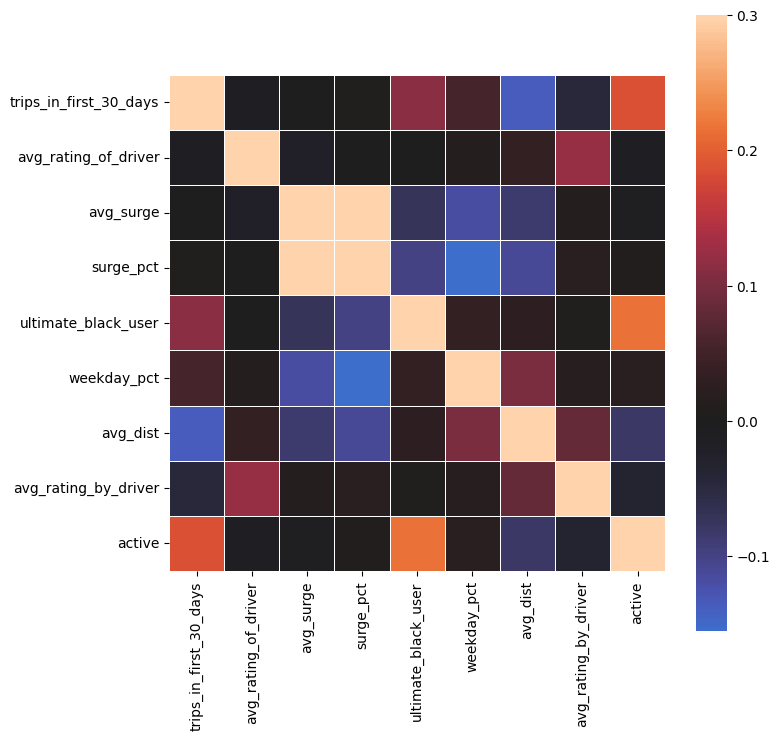

In [80]:

plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),vmax=.3, center=0,
            square=True, linewidths=.5)

In [81]:
#6 month user retention
from datetime import timedelta
retained_6 = lambda row: 1 if \
                      row["last_trip_date"] - row["signup_date"] \
                      > timedelta(days=30*5) \
                      else 0

df["retained_6"] = df.apply(retained_6, axis=1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,retained_6
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0


C:\Users\pmani\AppData\Local\Temp\ipykernel_22756\3434466229.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["Not Retained", "Retained"])


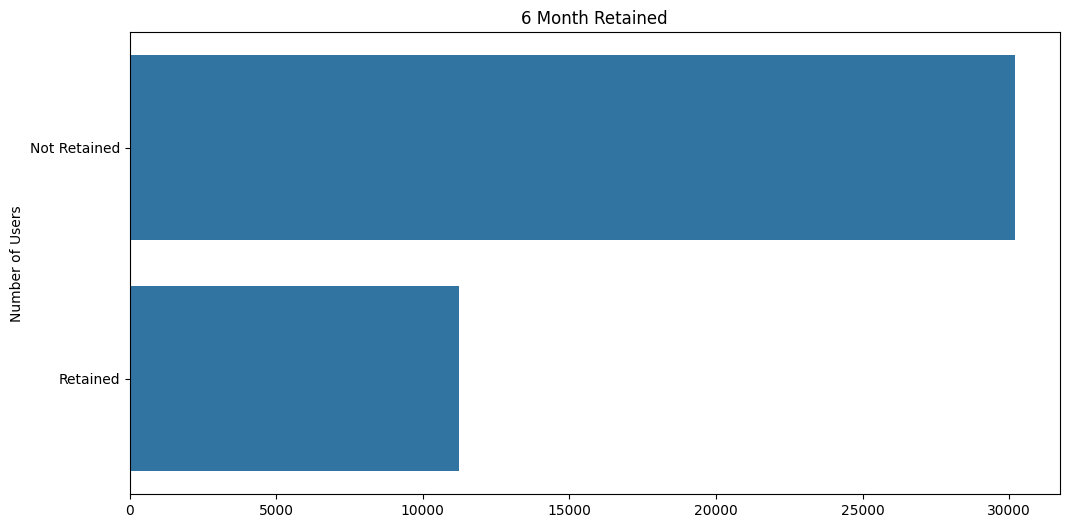

In [82]:
#plot 6 month retained vs. not
f, axes = plt.subplots(figsize=(12,6))
ax = sns.countplot(y=df["retained_6"])
ax.set(title="6 Month Retained", \
       xlabel="", ylabel="Number of Users")
ax.set_yticklabels(["Not Retained", "Retained"])
plt.show()

In [83]:
#preprocessing
df['ultimate_black_user'] = df['ultimate_black_user'].map({False:0, True:1}).astype('category')
df['active'] = df['active'].astype('category')
df.drop(['last_trip_date'], axis=1, inplace = True)
df.drop(['signup_date'], axis=1, inplace = True)
df.drop(['retained_6'], axis = 1, inplace = True)
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0


In [84]:
#One hot encoding categoricals
c_data = df.loc[:,["city", "phone", "ultimate_black_user"]]
encoder = OneHotEncoder(categories="auto", sparse_output=False, drop='first')
enc_c_data = pd.DataFrame(encoder.fit_transform(c_data))
enc_c_data.columns = encoder.get_feature_names_out()
df_model =df.drop(["city", "phone", "ultimate_black_user"], axis=1)
df_model = df_model.join(enc_c_data, how="left")
df_model.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_1
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1.0,0.0,1.0,1.0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0.0,0.0,0.0,0.0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0.0,0.0,1.0,0.0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1.0,0.0,1.0,1.0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0.0,1.0,0.0,0.0


In [85]:
df_model

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_1
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1.0,0.0,1.0,1.0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0.0,0.0,0.0,0.0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0.0,0.0,1.0,0.0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1.0,0.0,1.0,1.0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41440,3,4.8,1.11,11.1,55.6,2.53,4.7,0,0.0,0.0,1.0,1.0
41441,1,4.6,1.44,37.5,25.0,2.25,4.5,0,0.0,0.0,1.0,0.0
41442,0,5.0,1.00,0.0,100.0,5.63,4.2,1,1.0,0.0,1.0,0.0
41443,0,5.0,1.00,0.0,100.0,3.86,5.0,0,0.0,1.0,0.0,1.0


In [86]:
X = df_model.drop('active',axis=1)
y = df_model['active']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [87]:
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

#fit random forest classifier
rf = RandomForestClassifier(criterion='gini', class_weight='balanced', n_jobs=-1)

K_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1220)
scorer = make_scorer(roc_auc_score, greater_is_better = True)
param_grid = {'n_estimators' : [40, 50, 60], 'min_samples_split' : [2, 3, 4], 
              'max_depth' : [4, 7, 10]}

#Setup the Gridsearch
rf_cv = GridSearchCV(rf, param_grid, cv=K_fold, scoring=scorer,n_jobs=-1, verbose=1)

#Fit the data
rf_cv.fit(X_train, y_train)

#Print out the best model
print('Best RF Params: {}'.format(rf_cv.best_params_))
print('Best RF Score : %f' % rf_cv.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best RF Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best RF Score : 0.765142


In [88]:
#refit with best params
rf_best = RandomForestClassifier(criterion='gini', class_weight='balanced', n_jobs=-1, 
                                 n_estimators=rf_cv.best_params_['n_estimators'],
                                 min_samples_split=rf_cv.best_params_['min_samples_split'], 
                                 max_depth=rf_cv.best_params_['max_depth'])

rf_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       n_jobs=-1)

Text(20.72222222222222, 0.5, 'Actual')

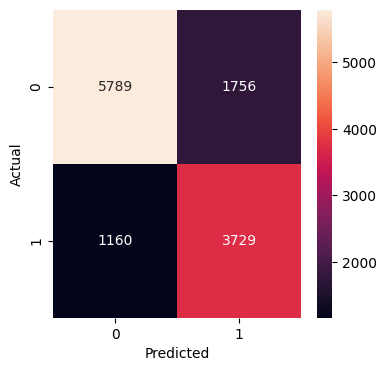

In [89]:
ypred = rf_best.predict(X_test)
cm = confusion_matrix(y_test, ypred)
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

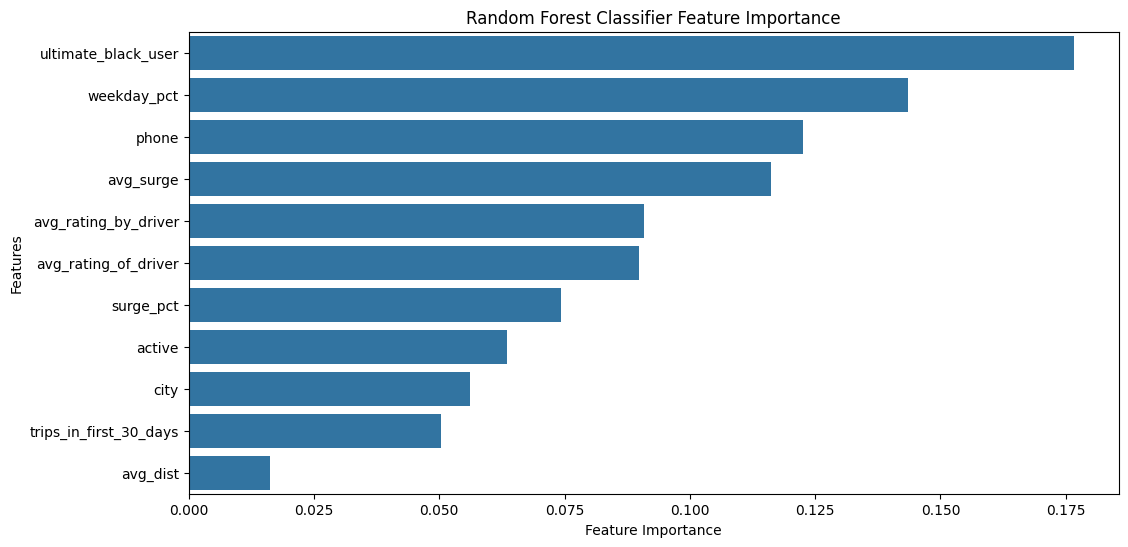

Feature Importance
                   Feature  Importance
6      ultimate_black_user    0.176723
7              weekday_pct    0.143550
4                    phone    0.122561
3                avg_surge    0.116135
9     avg_rating_by_driver    0.090950
2     avg_rating_of_driver    0.089784
5                surge_pct    0.074312
10                  active    0.063534
0                     city    0.056040
1   trips_in_first_30_days    0.050262
8                 avg_dist    0.016150


In [90]:
#most important features
features = list(df.columns)
rf_best_feats = pd.DataFrame({'Feature': features,
                   'Importance': rf_best.feature_importances_}).\
                    sort_values('Importance', ascending = False)
fig=plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'Importance', y = 'Feature', data = rf_best_feats)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Feature Importance')
plt.show();
print('\033[1m' + "Feature Importance" + '\033[0m')
print(rf_best_feats)